In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib as mpl

In [2]:
T=0.001;
W=5*(10**4);
sigma_=1;
gamma = 20;

In [3]:
mu0=2*T*W*(sigma_**2);
std0= np.sqrt(4*2*T*W*(sigma_**2));
mu1=(2*T*W+2*gamma)*(sigma_**2);
std1=np.sqrt(4*T*W+8*gamma)*(sigma_**4);

In [4]:
x=np.linspace(1,400,100)

In [5]:
y1 = stats.norm(mu0, std0).pdf(x)
y2 = stats.norm(mu1, std1).pdf(x)

In [6]:
mu0_params=np.zeros((3,3))
sd0_params=np.zeros((3,3))
mu1_params=np.zeros((3,3))
sd1_params=np.zeros((3,3))

In [7]:
plt.style.use('fivethirtyeight')
sigma_ = np.linspace(1,2,3)
gamma_ = np.linspace(10,20,3)
for i in np.arange(3):
    for j in np.arange(3):
        mu0_params[i,j] = 2*T*W*(sigma_[i]**2);
        sd0_params[i,j] = np.sqrt(4*2*T*W*(sigma_[i]**2));
        mu1_params[i,j] = (2*T*W+2*gamma_[j])*(sigma_[i]**2);
        sd1_params[i,j] = np.sqrt(4*T*W+8*gamma_[j])*(sigma_[i]**4);

In [8]:
sigma_

array([1. , 1.5, 2. ])

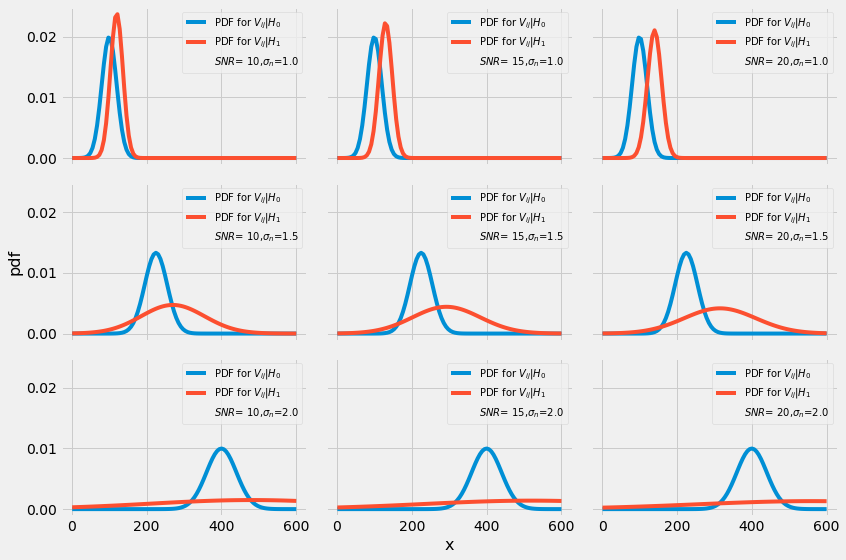

In [9]:
x = np.linspace(1,600,100)
f, ax = plt.subplots(len(mu0_params), len(sd0_params), sharex=True, sharey=True, figsize=(12,8))
for i in range(3):
    for j in range(3):
        mu0 = mu0_params[i][j]
        sd0 = sd0_params[i][j]
        mu1 = mu1_params[i][j]
        sd1 = sd1_params[i][j]
        
        y0 = stats.norm(mu0, sd0).pdf(x)
        y1 = stats.norm(mu1, sd1).pdf(x)

        ax[i, j].plot(x, y0,label='PDF for $V_{ij}|H_0$')
        ax[i, j].plot(x, y1,label='PDF for $V_{ij}|H_1$')
        ax[i, j].plot(0,0, label='$SNR$={:3.0f},$\sigma_n$={:3.1f}'.format(gamma_[j],sigma_[i]), alpha=0)
        ax[i, j].legend(fontsize=10)
ax[2,1].set_xlabel('x', fontsize=16)
ax[1,0].set_ylabel('pdf', fontsize=16)
#plt.suptitle('Distribution of test statistics', fontsize=16)
plt.tight_layout()
plt.show()

In [12]:
def compute_AB(x,T,W,gamma,sigma,g1,g2):
    mu0=2*T*W*(sigma**2);
    std0= np.sqrt(4*2*T*W*(sigma**2));
    #y0 = stats.norm(mu0, std0).pdf(x);
    
    mu1=(2*T*W+2*gamma)*(sigma**2);
    std1=np.sqrt(4*T*W+8*gamma)*(sigma**4);
    #y1 = stats.norm(mu0, std0).pdf(x);
    
    A=1 - stats.norm(mu1,std1).cdf(g2);
    B = stats.norm(mu1,std1).cdf(g2)-stats.norm(mu1,std1).cdf(g1);
    return A,B

In [13]:
def compute_PD(A,B,beta,N_i):
    l = np.arange(np.ceil(beta * N_i),N_i+1)
    PD = [0 for j in range(len(l))]
    for i in range(len(l)):
        PD[i] = (A**l[i])*(B**(N_i-l[i]));
    PDTotal = sum(PD);
    return PDTotal

In [14]:
x=np.linspace(1,400,100);
T = 0.001
W = 5e4
gamma = 20
sigma = 1
g1 = 80
g2 = 100
A,B = compute_AB(x,T,W,gamma,sigma,g1,g2)

beta = 0.8
N_i = 15
compute_PD(A,B,beta,N_i)

0.7805401475888064

In [15]:
mpl.rcParams.update(mpl.rcParamsDefault)

In [16]:
len(np.arange(0.7,1.0,0.03))
len(np.arange(10,20))

10

In [17]:
beta_array = np.linspace(0.7,1.0,10)
gamma_array = np.linspace(15,26,10)
result_array = np.zeros((len(beta_array),len(gamma_array)))
result_array

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [18]:
x=np.linspace(1,400,100);
T = 0.001
W = 5e4
gamma = 20
sigma = 1
g1 = 80
g2 = 100
#beta = 0.8
N_i = 15

beta_array = np.linspace(0.7,1,100)
gamma_array = np.linspace(15,26,100)

result_array = np.zeros((len(beta_array),len(gamma_array)))

for i in range(len(gamma_array)):
    for j in range(len(beta_array)):
        A1,B1 = compute_AB(x,T,W,gamma_array[i],sigma,g1,g2)
        result_array[i][j] = (compute_PD(A1,B1,beta_array[j],N_i))

In [20]:
Beta,Gamma = np.meshgrid(beta_array,gamma_array)

No handles with labels found to put in legend.


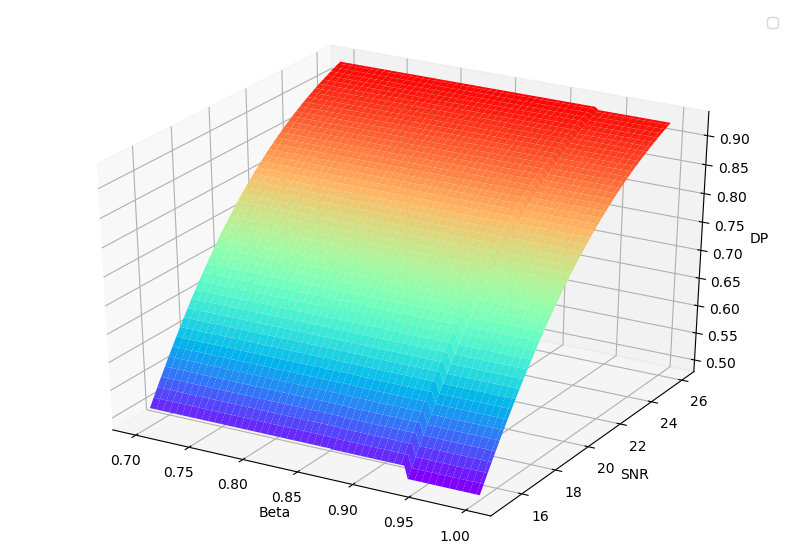

In [21]:
plt.figure(figsize=(10,7)) #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')
ax3.plot_surface(Beta,Gamma,result_array,cmap='rainbow')
ax3.set_xlabel('Beta')
ax3.set_ylabel('SNR')
ax3.set_zlabel('DP')
ax3.legend(loc=1)
plt.show()

Text(0, 0.5, 'DP')

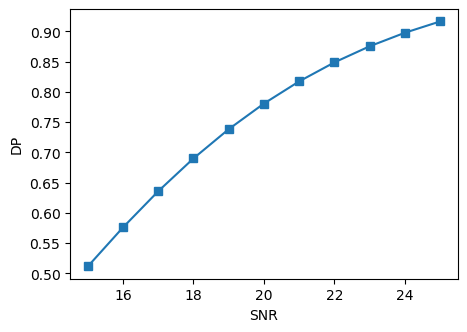

In [28]:
x=np.linspace(1,400,100);
T = 0.001
W = 5e4
#gamma = 20
sigma = 1
g1 = 80
g2 = 100
beta = 0.8
N_i = 15

gamma_array = np.arange(15,26)
result_array=[]
for gamma in gamma_array:
    A,B = compute_AB(x,T,W,gamma,sigma,g1,g2)
    result_array.append(compute_PD(A,B,beta,N_i))
plt.figure(figsize=(5,3.5))#add_subplot(1,1,1)
plt.plot(gamma_array,result_array,'-s')
plt.xlabel('SNR')
plt.ylabel('DP')

x=np.linspace(1,400,100);
T = 0.001
W = 5e4
gamma = 20
sigma = 1
g1 = 80
g2 = 100
beta = 0.8
N_i = 15

gamma_array = np.arange(10,20)
result_array=[]
for gamma in gamma_array:
    A,B = compute_AB(x,T,W,gamma,sigma,g1,g2)
    result_array.append(compute_PD(A,B,beta,N_i))
plt.figure(figsize=(5,3.5))#add_subplot(1,1,1)
plt.plot(gamma_array,result_array,'-s')
plt.xlabel('SNR')
plt.ylabel('DP')

In [42]:
x=np.linspace(1,400,100);
T = 0.001
W = 5e4
gamma = 20
sigma = 1
g1 = 80
g2 = 100
beta = 0.8
N_i = 15

T_array = np.linspace(0.001,0.0015,100)
gamma_array = np.linspace(15,26,100)

result_array = np.zeros((len(T_array),len(gamma_array)))

for i in range(len(T_array)):
    for j in range(len(gamma_array)):
        A1,B1 = compute_AB(x,T_array[i],W,gamma_array[j],sigma,g1,g2)
        result_array[i][j] = (compute_PD(A1,B1,beta,N_i))

In [43]:
Beta,Gamma = np.meshgrid(T_array,gamma_array)

No handles with labels found to put in legend.


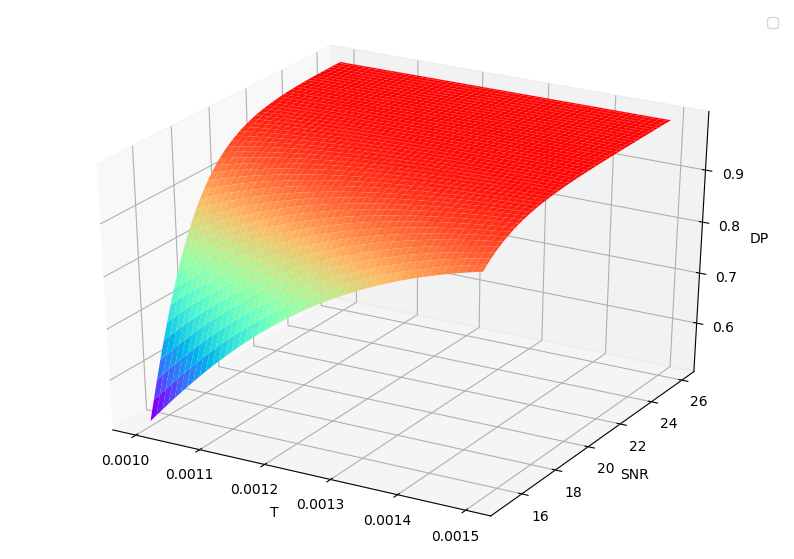

In [44]:
plt.figure(figsize=(10,7)) #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')
ax3.plot_surface(Beta,Gamma,result_array,cmap='rainbow')
ax3.set_xlabel('T')
ax3.set_ylabel('SNR')
ax3.set_zlabel('DP')
ax3.legend(loc=1)
#ax3.contour(X,Y,Z, zdim='z',offset=-2，cmap='rainbow) #等高线图，要设置offset，为Z的最小值
plt.show()

Text(0, 0.5, 'DP')

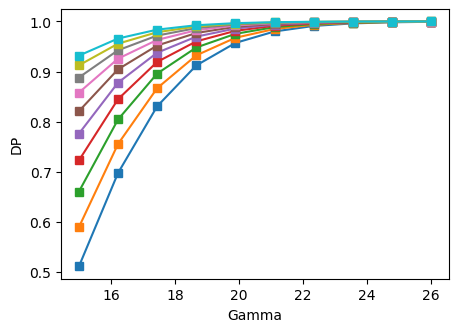

In [238]:
plt.figure(figsize=(5,3.5))#add_subplot(1,1,1)
plt.plot(gamma_array,result_array,'-s')
plt.xlabel('Gamma')
plt.ylabel('DP')

Text(0, 0.5, 'DP')

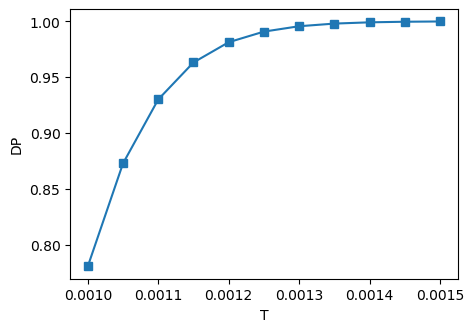

In [94]:
x=np.linspace(1,400,100);
T = 0.001
W = 5e4
gamma = 20
sigma = 1
g1 = 80
g2 = 100
beta = 0.8
N_i = 15

T_array = np.linspace(0.001,0.0015,11)
result_array=[]
for T in T_array:
    A,B = compute_AB(x,T,W,gamma,sigma,g1,g2)
    result_array.append(compute_PD(A,B,beta,N_i))
plt.figure(figsize=(5,3.5))#add_subplot(1,1,1)
plt.plot(T_array,result_array,'-s')
plt.xlabel('T')
plt.ylabel('DP')

In [68]:
x=np.linspace(1,400,100);
T = 0.001
W = 5e4
gamma = 20
sigma = 1
g1 = 80
g2 = 100
beta = 0.8
N_i = 15

W_array = np.linspace(5e4,6e4,100)
gamma_array = np.linspace(15,26,100)

result_array = np.zeros((len(W_array),len(gamma_array)))

for i in range(len(W_array)):
    for j in range(len(gamma_array)):
        A1,B1 = compute_AB(x,T,W_array[i],gamma_array[j],sigma,g1,g2)
        result_array[i][j] = (compute_PD(A1,B1,beta,N_i))

In [69]:
WW,Gamma = np.meshgrid(W_array,gamma_array)

No handles with labels found to put in legend.


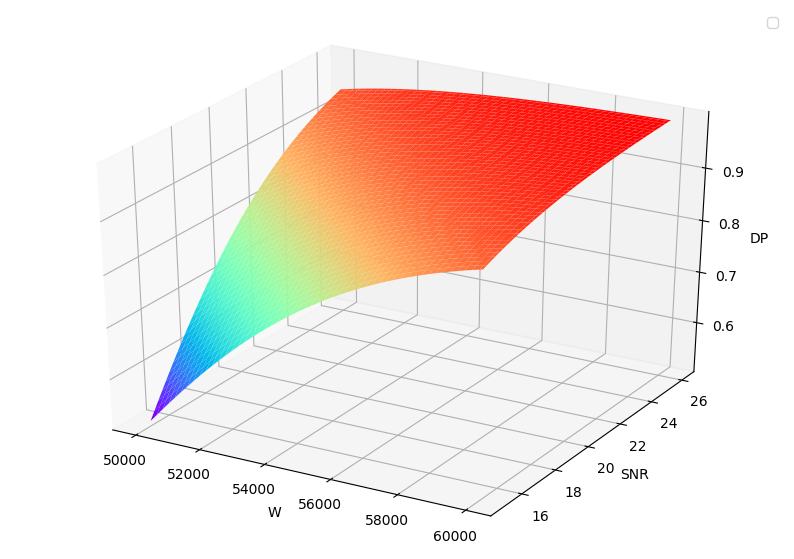

In [70]:
plt.figure(figsize=(10,7)) #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')
ax3.plot_surface(WW,Gamma,result_array,cmap='rainbow')
ax3.set_xlabel('W')
ax3.set_ylabel('SNR')
ax3.set_zlabel('DP')
ax3.legend(loc=1)
#ax3.contour(X,Y,Z, zdim='z',offset=-2，cmap='rainbow) #等高线图，要设置offset，为Z的最小值
plt.show()

Text(0, 0.5, 'DP')

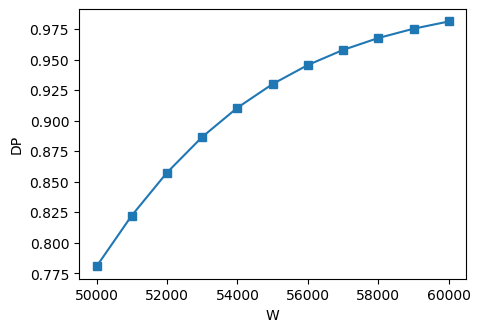

In [103]:
x=np.linspace(1,400,100);
#T = 0.001
#W = 5e4
#gamma = 20
#sigma = 1
g1 = 80
g2 = 100
beta = 0.8
N_i = 15

W_array = np.linspace(5e4,6e4,11)
result_array=[]
for W in W_array:
    A,B = compute_AB(x,T,W,gamma,sigma,g1,g2)
    result_array.append(compute_PD(A,B,beta,N_i))
plt.figure(figsize=(5,3.5))#add_subplot(1,1,1)
plt.plot(W_array,result_array,'-s')
plt.xlabel('W')
plt.ylabel('DP')

In [53]:
x=np.linspace(1,400,100);
T = 0.001
W = 5e4
gamma = 20
sigma = 1
g1 = 80
g2 = 100
beta = 0.8
N_i = 15

sigma_array = np.linspace(1,1.5,100)
gamma_array = np.linspace(15,26,100)

result_array = np.zeros((len(sigma_array),len(gamma_array)))

for i in range(len(sigma_array)):
    for j in range(len(gamma_array)):
        A1,B1 = compute_AB(x,T,W,gamma_array[j],sigma_array[i],g1,g2)
        result_array[i][j] = (compute_PD(A1,B1,beta,N_i))

In [56]:
Sigma,Gamma = np.meshgrid(sigma_array,gamma_array)

No handles with labels found to put in legend.


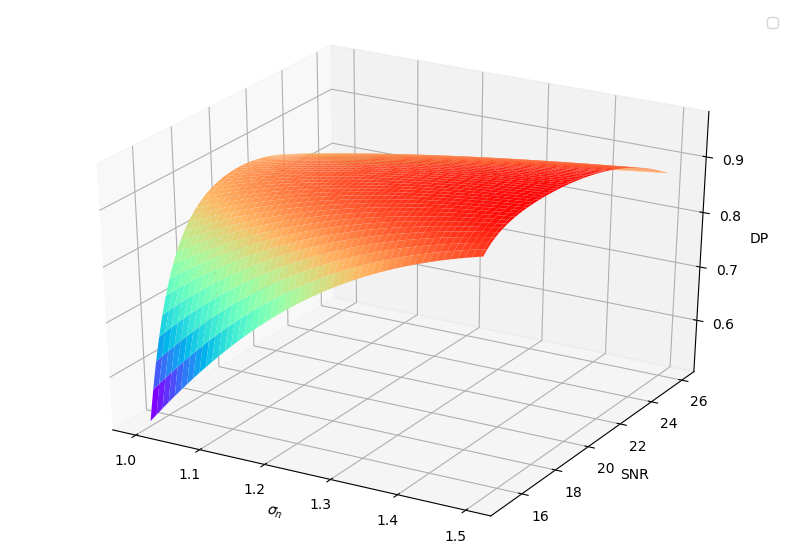

In [61]:
plt.figure(figsize=(10,7)) #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')
ax3.plot_surface(Sigma,Gamma,result_array,cmap='rainbow')
ax3.set_xlabel('$\sigma_n$')
ax3.set_ylabel('SNR')
ax3.set_zlabel('DP')
ax3.legend(loc=1)
#ax3.contour(X,Y,Z, zdim='z',offset=-2，cmap='rainbow) #等高线图，要设置offset，为Z的最小值
plt.show()

Text(0, 0.5, 'DP')

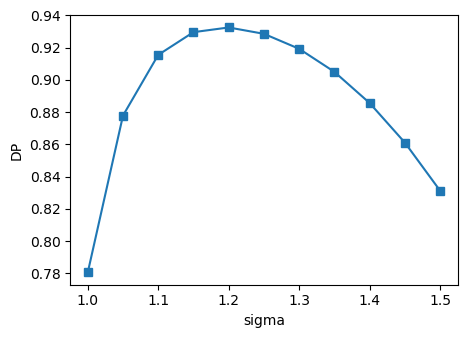

In [124]:
x=np.linspace(1,400,100);
T = 0.001
W = 5e4
gamma = 20
sigma = 1
g1 = 80
g2 = 100
beta = 0.8
N_i = 15

sigma_array = np.linspace(1,1.5,11)
result_array=[]
for sigma in sigma_array:
    A,B = compute_AB(x,T,W,gamma,sigma,g1,g2)
    result_array.append(compute_PD(A,B,beta,N_i))
plt.figure(figsize=(5,3.5))#add_subplot(1,1,1)
plt.plot(sigma_array,result_array,'-s')
plt.xlabel('sigma')
plt.ylabel('DP')

In [219]:
x=np.linspace(1,400,100);
T = 0.001
W = 5e4
gamma = 20
sigma = 1
g1 = 80
g2 = 100
beta = 0.8
N_i = 15

g1_array = np.linspace(60,80,100)
g2_array = np.linspace(80,100,100)

result_array = np.zeros((len(g1_array),len(g2_array)))

for i in range(len(g1_array)):
    for j in range(len(g2_array)):
        A1,B1 = compute_AB(x,T,W,gamma,sigma,g1_array[i],g2_array[j])
        result_array[i][j] = (compute_PD(A1,B1,beta,N_i))

In [220]:
G1,G2 = np.meshgrid(g1_array,g2_array)

In [212]:
G1.shape,G2.shape

((10, 10), (10, 10))

In [193]:
plt.imshow?

In [200]:
g1_array.shape

(100,)

In [215]:
len(np.linspace(60,80,10))

10

In [230]:
np.linspace(60,80,6)

array([60., 64., 68., 72., 76., 80.])

In [231]:
np.linspace(80,100,6)

array([ 80.,  84.,  88.,  92.,  96., 100.])

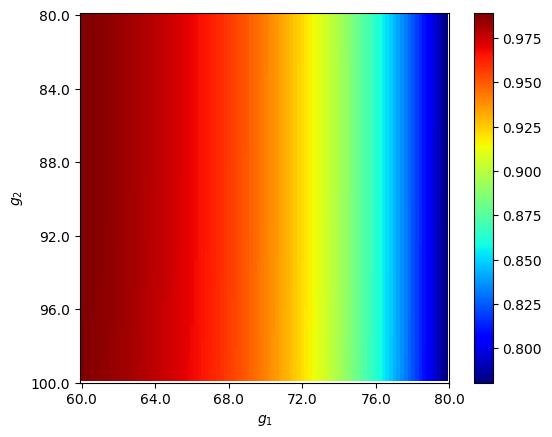

In [233]:
plt.imshow(result_array,cmap=plt.cm.jet)
plt.xlabel('$g_1$')
plt.ylabel('$g_2$')
plt.colorbar()
plt.xticks(np.linspace(0,100,6),np.linspace(60,80,6))
plt.yticks(np.linspace(0,100,6),np.linspace(80,100,6))
plt.show()

No handles with labels found to put in legend.


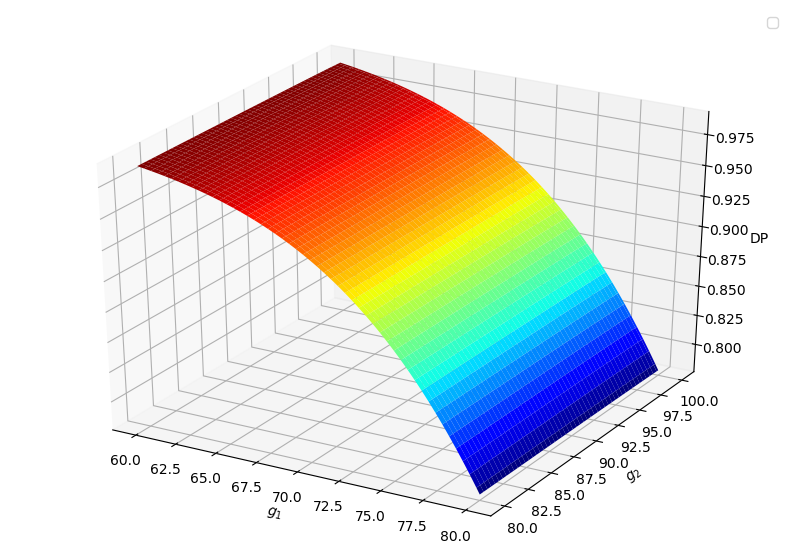

In [158]:
plt.figure(figsize=(10,7)) #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')
ax3.plot_surface(G1,Gamma,result_array,cmap=plt.cm.jet)
ax3.set_xlabel('$g_1$')
ax3.set_ylabel('$g_2$')
ax3.set_zlabel('DP')
ax3.legend(loc=1)
#ax3.contour(X,Y,Z, zdim='z',offset=-2，cmap='rainbow) #等高线图，要设置offset，为Z的最小值
plt.show()

Text(0, 0.5, 'DP')

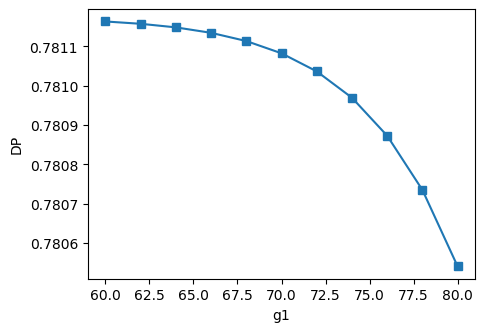

In [125]:
x=np.linspace(1,400,100);
T = 0.001
W = 5e4
gamma = 20
sigma = 1
g1 = 80
g2 = 100
beta = 0.8
N_i = 15

g1_array = np.linspace(60,80,11)
result_array=[]
for g1 in g1_array:
    A,B = compute_AB(x,T,W,gamma,sigma,g1,g2)
    result_array.append(compute_PD(A,B,beta,N_i))
plt.figure(figsize=(5,3.5))#add_subplot(1,1,1)
plt.plot(g1_array,result_array,'-s')
plt.xlabel('g1')
plt.ylabel('DP')

In [100]:
x=np.linspace(1,400,100);
T = 0.001
W = 5e4
gamma = 20
sigma = 1
g1 = 80
g2 = 100
beta = 0.8
N_i = 15

g2_array = np.linspace(80,100,100)
gamma_array = np.linspace(15,26,100)

result_array = np.zeros((len(gamma_array),len(g2_array)))

for i in range(len(g2_array)):
    for j in range(len(gamma_array)):
        A1,B1 = compute_AB(x,T,W,gamma_array[j],sigma,g1,g2_array[j])
        result_array[i][j] = (compute_PD(A1,B1,beta,N_i))

In [101]:
G2,Gamma = np.meshgrid(g2_array,gamma_array)

No handles with labels found to put in legend.


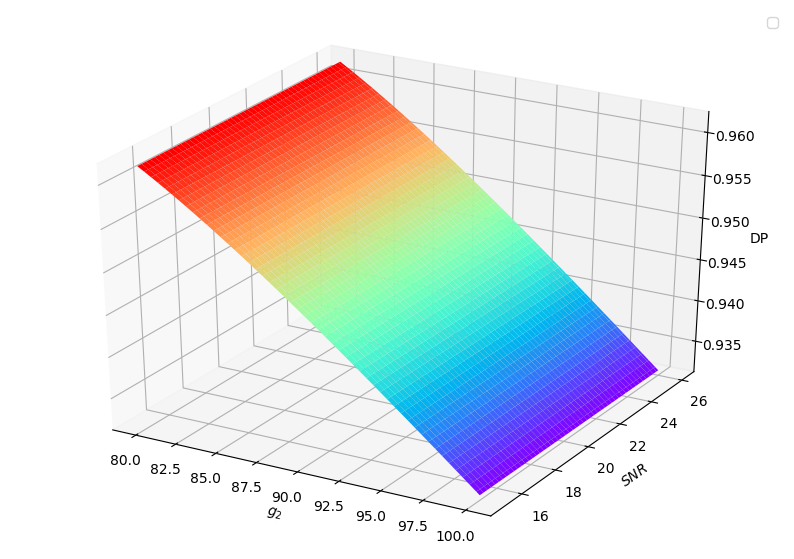

In [102]:
plt.figure(figsize=(10,7)) #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')
ax3.plot_surface(G2,Gamma,result_array,cmap='rainbow')
ax3.set_xlabel('$g_2$')
ax3.set_ylabel('$SNR$')
ax3.set_zlabel('DP')
ax3.legend(loc=1)
#ax3.contour(X,Y,Z, zdim='z',offset=-2，cmap='rainbow) #等高线图，要设置offset，为Z的最小值
plt.show()

Text(0, 0.5, 'DP')

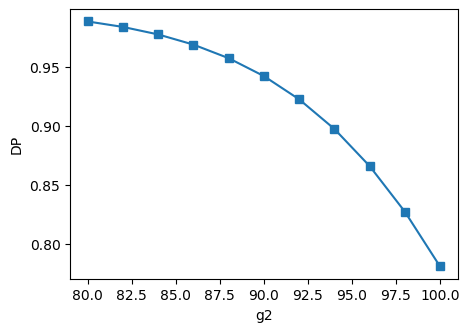

In [126]:
x=np.linspace(1,400,100);
T = 0.001
W = 5e4
gamma = 20
sigma = 1
g1 = 80
g2 = 100
beta = 0.8
N_i = 15

g2_array = np.linspace(80,100,11)
result_array=[]
for g2 in g2_array:
    A,B = compute_AB(x,T,W,gamma,sigma,g1,g2)
    result_array.append(compute_PD(A,B,beta,N_i))
plt.figure(figsize=(5,3.5))#add_subplot(1,1,1)
plt.plot(g2_array,result_array,'-s')
plt.xlabel('g2')
plt.ylabel('DP')

In [107]:
Neighbor = np.linspace(15,30,16)
Neighbor

array([15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30.])

In [273]:
x=np.linspace(1,400,100);
T = 0.001
W = 5e4
gamma = 20
sigma = 1
g1 = 80
g2 = 100
beta = 0.8
N_i = 15

Neighbor = np.linspace(15,30,100)
gamma_array = np.linspace(15,26,100)

result_array=np.zeros((len(Neighbor),len(gamma_array)))


for i in range(len(Neighbor)):
    for j in range(len(gamma_array)):
        A1,B1 = compute_AB(x,T,W,gamma_array[j],sigma,g1,g2)
        result_array[i][j] = (compute_PD(A1,B1,beta,N_i))

In [274]:
result_array

array([[0.51120503, 0.51857913, 0.52590796, ..., 0.92861318, 0.93022741,
        0.93180763],
       [0.51120503, 0.51857913, 0.52590796, ..., 0.92861318, 0.93022741,
        0.93180763],
       [0.51120503, 0.51857913, 0.52590796, ..., 0.92861318, 0.93022741,
        0.93180763],
       ...,
       [0.51120503, 0.51857913, 0.52590796, ..., 0.92861318, 0.93022741,
        0.93180763],
       [0.51120503, 0.51857913, 0.52590796, ..., 0.92861318, 0.93022741,
        0.93180763],
       [0.51120503, 0.51857913, 0.52590796, ..., 0.92861318, 0.93022741,
        0.93180763]])

In [275]:
Nei,Gamma = np.meshgrid(Neighbor,gamma_array)

No handles with labels found to put in legend.


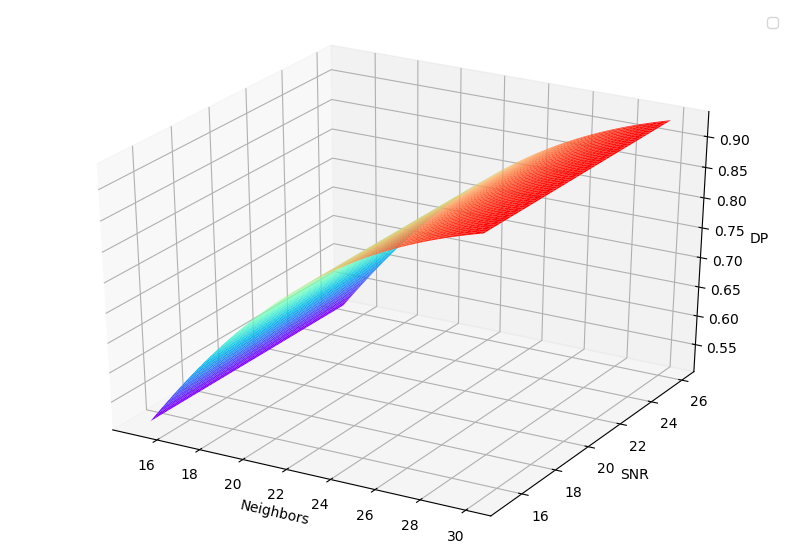

In [276]:
plt.figure(figsize=(10,7)) #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')
ax3.plot_surface(Nei,Gamma,result_array,cmap='rainbow')
ax3.set_xlabel('Neighbors')
ax3.set_ylabel('SNR')
ax3.set_zlabel('DP')
ax3.legend(loc=1)
#ax3.contour(X,Y,Z, zdim='z',offset=-2，cmap='rainbow) #等高线图，要设置offset，为Z的最小值
plt.show()

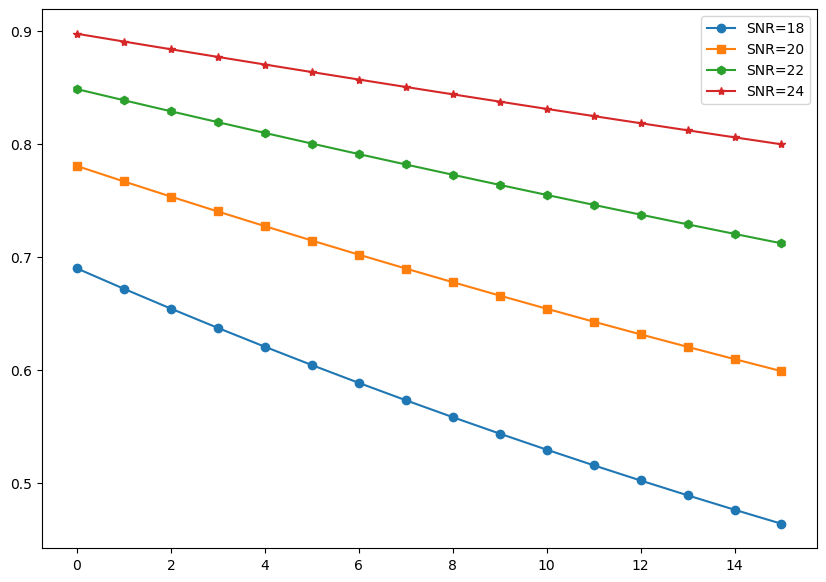

In [139]:
plt.figure(figsize=(10,7))
plt.plot(result_array.T[0],'-o',label='SNR=18')
plt.plot(result_array.T[1],'-s',label='SNR=20')
plt.plot(result_array.T[2],'-h',label='SNR=22')
plt.plot(result_array.T[3],'-*',label='SNR=24')
plt.legend()

In [ ]:
plt.figure(figsize=(10,7)) #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')
ax3.plot_surface(G2,Gamma,result_array,cmap='rainbow')
ax3.set_xlabel('$g_2$')
ax3.set_ylabel('$SNR$')
ax3.set_zlabel('DP')
ax3.legend(loc=1)
#ax3.contour(X,Y,Z, zdim='z',offset=-2，cmap='rainbow) #等高线图，要设置offset，为Z的最小值
plt.show()

Text(0, 0.5, 'DP')

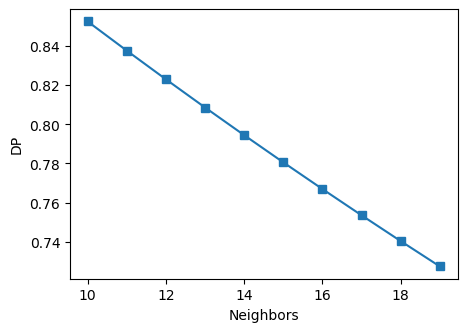

In [129]:
x=np.linspace(1,400,100);
T = 0.001
W = 5e4
gamma = 20
sigma = 1
g1 = 80
g2 = 100
beta = 0.8
N_i = 15

N_i_array = np.arange(10,20)
result_array=[]
for N_i in N_i_array:
    A,B = compute_AB(x,T,W,gamma,sigma,g1,g2)
    result_array.append(compute_PD(A,B,beta,N_i))
plt.figure(figsize=(5,3.5))#add_subplot(1,1,1)
plt.plot(N_i_array,result_array,'-s')
plt.xlabel('Neighbors')
plt.ylabel('DP')

In [241]:
x=np.linspace(1,400,100);
T = 0.001
W = 5e4
gamma = 20
sigma = 1
g1 = 80
g2 = 100
beta = 0.8
N_i = 15

T_array = np.linspace(0.0005,0.0015,100)
W_array = np.linspace(4.5e4,5.5e4,100)

result_array = np.zeros((len(T_array),len(W_array)))

for i in range(len(T_array)):
    for j in range(len(W_array)):
        A1,B1 = compute_AB(x,T_array[i],W_array[j],gamma,sigma,g1,g2)
        result_array[i][j] = (compute_PD(A1,B1,beta,N_i))

In [242]:
TT,WW = np.meshgrid(T_array,W_array)

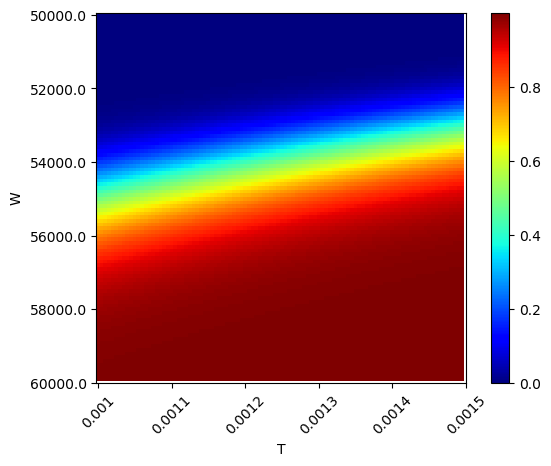

In [247]:
plt.imshow(result_array,cmap=plt.cm.jet)
plt.xlabel('T')
plt.ylabel('W')
plt.colorbar()
plt.xticks(np.linspace(0,100,6), [round(i,4) for i in np.linspace(0.001,0.0015,6)],rotation = 45)
plt.yticks(np.linspace(0,100,6), np.linspace(5e4,6e4,6))

plt.show()